## CSCI 476 / 576 - Computer Vision - Lecture 1

#### Logistics / Introductory Remarks
 * About me
 * About you
     * Name cards
     * Canvas survey out, due tomorrow night
     * Informal poll questions:
         * Taken ML here?
         * Worked with numpy before?
         * Got up before 7 this morning?
 * Course webpage / syllabus: https://facultyweb.cs.wwu.edu/~wehrwes/courses/csci476_24w/. Also available on Canvas Syllabus page.
    * **For Thursday:** read the syllabus and bring questions Thursday.
 * Format remarks
     * 2-hour classes
     * Jupyterlab + whiteboard
       * Lecture are in a public github repo: https://github.com/csci476-24w/476-lectures
     * 476 (undergrad) and 576 (grad)

#### Goals

* Know about a sampling of computer vision applications and understand the notion of vision tasks ranging from "low level" to "high level"
* Appreciate why computer vision is hard
* Know how images are formed under a simple pinhole camera model
* Understand how images are represented:
  * On a computer
  * In math
* Know how to represent color using different color spaces including RGB, HSV, and Lab
* Be able to write down mathematical image transformations that perform
  simple photometric or geometric manipulations of images functions

#### Lesson Plan

Quick introductions and day-1 logistics; name cards.

Some logistics / introductory remarks:
 
  

What is computer vision? 

Why is it hard?

(**break** here?)

How are images formed?

(or **break** here)

How are images represented?

What can we *do* to images?
* Photometric transformations
* Geometric transformations

In [45]:
# Some basic setup
%load_ext autoreload
%autoreload 2

import os
import sys

src_path = os.path.abspath("../src")
if (src_path not in sys.path):
    sys.path.insert(0, src_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# Library imports
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import skimage as skim

### What comes to mind when you hear computer vision?
Brainstorm:

* Mimic biological visual systems (including humans'!)
* Extracting useful information from images
* Linear algebra
* Image processing
* Image understanding
* Object detection
* Edge detection
* segmentation
* Transformations - scaling, warping, slicing
* 3D reconstruction
* Image generation
* Video compression
* Text extraction (optical character recognition / OCR)
* Denoising
* Image enhancement

### Some classic computer vision problems:


### Why are these hard problems?

* We humans have excellent visual systems built-in, and it's easy to take a lot of our capabilities for granted.

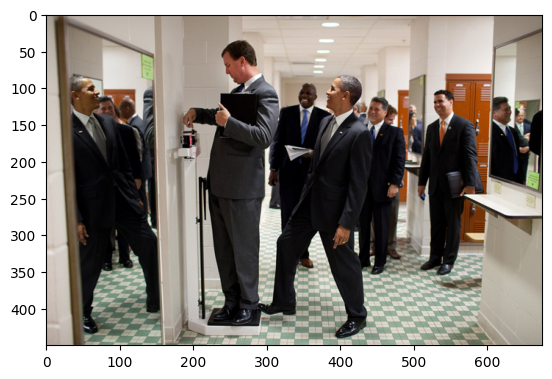

In [47]:
funny = imageio.imread("../data/obamafunny.jpg")
plt.imshow(funny)

Source: [The state of Computer Vision and AI: we are really, really far away (2012)](http://karpathy.github.io/2012/10/22/state-of-computer-vision/)

**Question to ponder**: are we still really, really far? Can GPT-4V explain why the image is funny?

### Our starting point:
Zoom in on the top left corner:

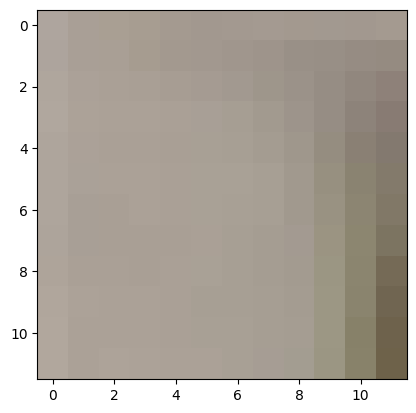

In [48]:
plt.imshow(funny[:12, :12, :])

In [49]:
funny[:12, :12, 0]

array([[174, 169, 169, 167, 164, 162, 163, 164, 163, 162, 162, 164],
       [173, 169, 169, 166, 163, 162, 160, 158, 153, 152, 150, 149],
       [175, 171, 170, 169, 167, 165, 162, 158, 155, 150, 145, 142],
       [176, 172, 171, 171, 170, 168, 166, 162, 157, 150, 141, 136],
       [174, 171, 170, 170, 169, 168, 167, 164, 159, 149, 138, 131],
       [174, 170, 171, 171, 170, 169, 169, 167, 161, 151, 138, 131],
       [174, 168, 169, 171, 170, 169, 168, 167, 161, 153, 140, 129],
       [173, 168, 169, 169, 169, 170, 167, 165, 163, 155, 140, 124],
       [174, 170, 170, 169, 170, 169, 167, 165, 163, 155, 139, 117],
       [176, 172, 171, 171, 170, 167, 167, 166, 164, 156, 138, 112],
       [177, 171, 171, 171, 170, 168, 168, 166, 165, 156, 135, 110],
       [177, 171, 173, 172, 171, 171, 168, 166, 163, 155, 136, 110]],
      dtype=uint8)

### Reasons vision is hard:

* Definitions - what is a cat even? (google image search for cat)
* Ambiguities - 3D to 2D projection, color vs lighting vs depth discontinuity

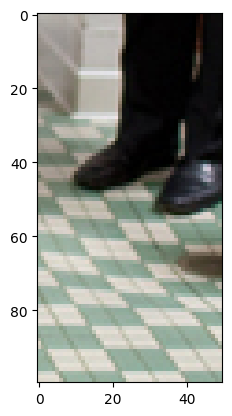

In [50]:
plt.imshow(funny[300:400, 500:550])

* Scale
    * images are big (MB)
    * videos are bigger (GB)
    * representative sets of images are even bigger than that (?? up to millions or billions of images)
  

In [52]:
# show size of funny
np.prod(funny.shape)

911250

##### **HW problem 1:**
Rank the following computer vision tasks from "low-level" to "high-level". There is not necessarily a single right answer, but there are many orderings we should all be able to agree on.

1. Smoothing out graininess in an image without blurring the edges of objects
2. For each pixel in a video frame, estimate the location of that pixel's content in the following frame (i.e., estimate per-pixel motion vectors, AKA optical flow)
3. Labeling all the cats in a photo
4. Generating an English language explanation of why an image is funny
5. Brightening an image
6. Reconstructing the 3D geometry of an object given photos from multiple perspectives
7. Segmenting the foreground to create a background blur effect for videoconferencing

5, (1, 7), 2, 6, 3, 4

# Break?

### Image Formation
How do images come into existence?

Whiteboard

##### **HW problem 2:**

A (physical) pinhole camera is simply a box with a hole in it. Describe how the image would change if you made the distance from the pinhole to the back of the box longer or shorter. Assume the other box dimensions stay the same.


#### What is color?
Color theory is surprisingly deep. We'll just scratch the surface.

(600, 600, 3)

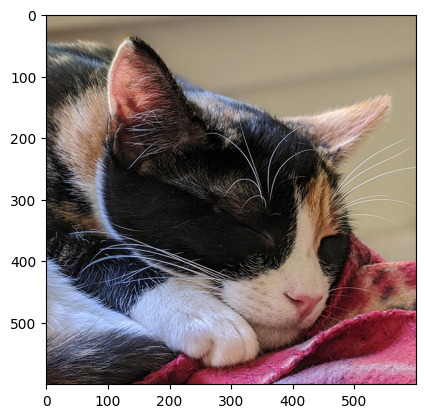

In [54]:
beans = imageio.imread("../data/beans.jpg")
plt.imshow(beans)
beans.shape

In [55]:
# look at a single pixel of beans
beans[0,0,:]

array([164, 150, 124], dtype=uint8)

In [ ]:
# play with different rgb values

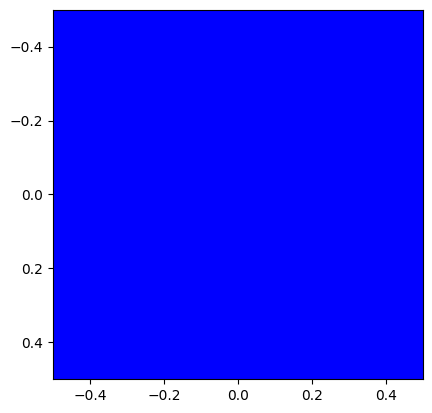

In [59]:
c = np.zeros((1,1,3))
c[:] = [0, 0, 1]
plt.imshow(c)

#### Why RGB?
![](https://askabiologist.asu.edu/sites/default/files/resources/articles/seecolor/Light-though-eye-big.png)

![](https://askabiologist.asu.edu/sites/default/files/cones_graph.gif)

Source: [ASU](https://askabiologist.asu.edu/rods-and-cones)

##### RGB: Not the only game in town

* You can think of RGB color as a cube: [https://www.infinityinsight.com/product.php?id=91](https://www.infinityinsight.com/product.php?id=91)
* Pros: display (and vaguely human-eye) native, intuitive-ish

A couple other interesting color spaces:
##### Hue-Saturation-Lightness (HSL):
  * Pros: intuitive control for color picking
    
  ![](http://www.ece.northwestern.edu/local-apps/matlabhelp/toolbox/images/hsvcone.gif)

##### CIE L\*a\*b\*
  * Pros:
      * the L\* channel is the luminance, or what the image should look like in "black and white"
      * (mostly) perceptually uniform
  * Cons: a\* and b\* give unintuitive control over color
     
  ![](https://www.xrite.com/-/media/modules/weblog/blog/lab-color-space/lab-color-space.png?h=622&w=600&la=en&hash=53A76941BAB3015346FAB3689739E967843CF8EA)

Interactive color picker with many color spaces: [https://colorizer.org/](https://colorizer.org/)
  

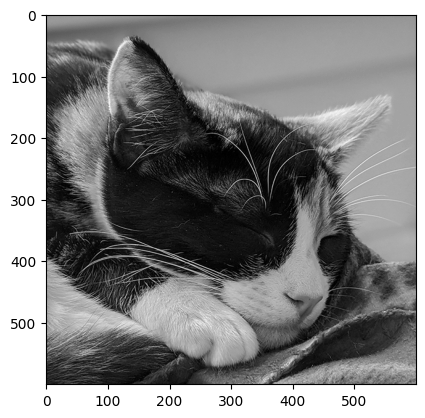

In [61]:
plt.imshow(skim.color.rgb2gray(beans), cmap="gray")

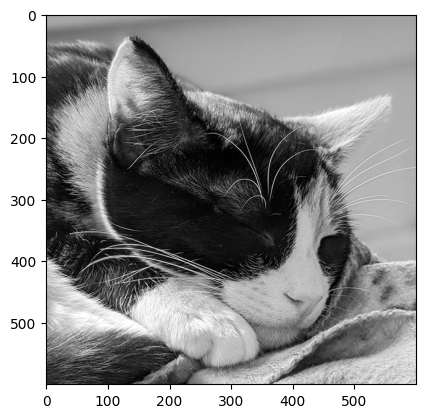

In [66]:
# play with skim.color.rgb2hsv
plt.imshow(skim.color.rgb2hsv(beans)[:,:,2], cmap="gray")

In [ ]:
# play with skim.color.rgb2lab

### Image representation:
* Computationally: `ndarray` of size `(height, width, 3)`
* Mathematically: a function mapping **position** to **intensity** (or color)
    * Grayscale image (one intensity value per pixel): $f: \mathbb{R}^2 \Rightarrow \mathbb{R}$
    * Color image (three intensity values per pixel): $f: \mathbb{R}^2 \Rightarrow \mathbb{R^3}$
 
    * A couple points of awkwardness when comparing this to an `ndarray`:
      * What happens outside the image boundaries?
      * What is the image's intensity value in between integer pixel indices?
      * What range of intensity values are mapped onto distinguishable colors on a real display?

In [67]:
beans.dtype

dtype('uint8')

In [68]:
beans.min(), beans.max()

(0, 255)

**Important convention:** most standard images (e.g., jpg, png, etc) are stored with 8-bit (1-byte) values for R, G, and B.
If we want to do math (or anything!) to an image, we will get quantization error. 

To avoid this, we always convert to floating-point values after loading. 

The standard convention for the valid (displayable) **range** of floating-point values is 0 (darkest) to 1 (lightest).

For this reason, I wrote a little utility function:

In [69]:
# Codebase imports
# nb: the modification to sys.path at the top of the notebook makes these imports from ../src/ work
import util
import filtering

In [70]:
beans = util.byte2float(beans)
beans.dtype

dtype('float32')

In [71]:
beans.min(), beans.max()

(0.0, 1.0)

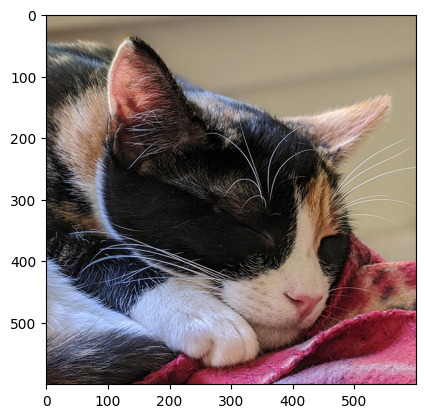

In [72]:
# matplotlib obeys these dtype/range conventions:
# if it sees bytes, it assumes 0-255
# if it sees floats, its assumes 0-1 range
plt.imshow(beans)

### What can we *do* to images?

One category: **Photometric transformations** - messing with the intensity values.

Suppose $g(x, y) = f(x, y) + .2$

or in other words,
`g = beans + 0.2`

How will $g$ compare to $f$?

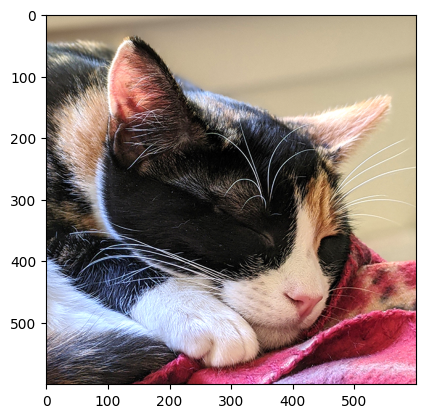

In [77]:
g = beans * 1.2
plt.imshow(g.clip(0,1))

##### Brightness

$$ g(x, y) = s * f(x, y)$$

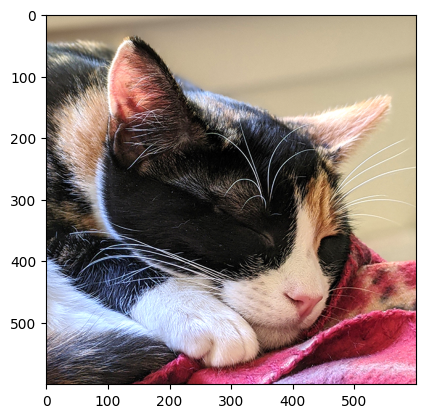

In [81]:
# implement filtering.brightness
g = filtering.brightness(beans, 1.2)
plt.imshow(g)

##### Thresholding
$$
h(x, y) = 
\begin{cases}
0 \textrm{ if } f(x, y) < t\\
1 \textrm{ if } f(x, y) \ge t\\
\end{cases}
$$


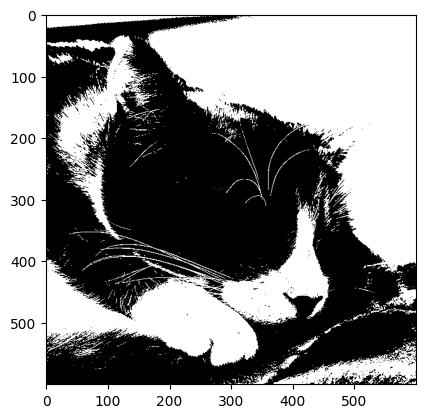

In [84]:
beans_gray = skim.color.rgb2gray(beans)

# implement filtering.threshold
g = filtering.threshold(beans_gray, 0.5)
plt.imshow(g, cmap="gray")

##### **Homework Problems 5-6:**
5. Suppose you want to make an RGB color image stored in an array `a` more saturated, without allowing any pixel values to go outside the range from 0 to 1. Write pseudocode (or python code) to implement this.
6. Given a grayscale image $f(x, y)$, how could you increase the *contrast*? In other words, how could you make the bright stuff brighter and dark stuff darker? Give your answer mathematically (not as code), and as above, your approach should not allow values to go outside their original range from 0 to 1; ideally you'll also avoid the need to clamp. *Hint*: try playing around with plotting some different functions on the input range $[0,1]$ to see if you can find one that does what we want. 

Another category of image transformations: **geometric transformations** - messing with the domain of the function.

Example: $g(x, y) = f(-x, y)$

What would this look like?

And how would we write it in code?

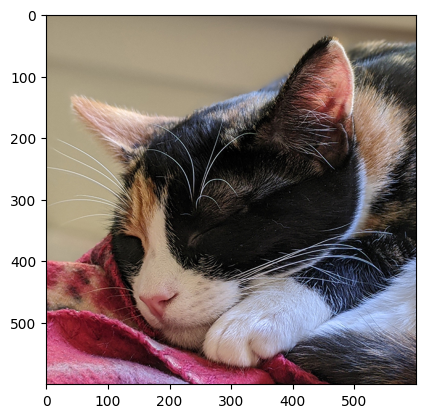

In [87]:
plt.imshow(beans[:, ::-1, :]) # perform the above transformation

##### **Homework Problems 6-7**:
6. In terms of an input image $f(x, y)$, write a mathematical expression for a new image $g$ that is shifted four pixels to the left.
7. In terms of an input image $f(x, y)$, write a mathematical expression for a new image $g$ that is twice as big (i.e., larger by a factor of two in both $x$ and $y$).